<html id="** 数の計算・基本的な関数">
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	<h2>数の計算・基本的な関数</h2>
</html>

<html>
    <h3>準備</h3>
    <p>
      jupyterでhtml.tableを使うと以前のようにcssが有効にならないので、table関連のCSSを最初に読み込みます。
    </p>
    <p>
      また、jupyterのノートブックでもSageのノートブック同様に使えるようにsage_util.pyを読み込みます。
    </p>
</html>

In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/sage_table_form.css">

In [2]:
# ユーティリティ
load('script/sage_util.py')

<html id="*** よく使われる定数">
	<h3>よく使われる定数</h3>
	<p>
		数式でよく使われる定数をSageで使うには以下の様に表します。
	</p>
    <p>
      注意）無限大は、oを2個並べたooです。
    <p>
</html>

In [3]:
# jupyter用のdisplayメソッド
hdr=["円周率", "自然体数の底", "虚数単位", "無限大"]
sts=[pi, e, I, oo]
# sage_util.pyのTable2Htmlを使用
Table2Html([(h, "$%s$"%latex(st), str(st)) for (h, st) in zip(hdr, sts)])

円周率,$\pi$,pi
自然体数の底,$e$,e
虚数単位,$i$,I
無限大,$+\infty$,+Infinity


<html id="*** 基本的な計算">
	<h3>基本的な計算</h3>
	<p>
		四則演算をはじめ、Sageで使われる基本的な計算の表現方法を以下に示します。
	</p>
</html>


In [4]:
# よく使われる表現
var('a b x n')
hdr=["積", "商", "累乗", "平方根", "n乗根", "絶対値", "自然対数", "階乗"]
sts=[a*b, a/b, a^b, sqrt(x), x^(1/n), abs(x), log(x), factorial(n)]
Table2Html([(h, "$%s$"%latex(st), str(st)) for (h, st) in zip(hdr, sts)])

積,$a b$,a*b
商,$\frac{a}{b}$,a/b
累乗,$a^{b}$,a^b
平方根,$\sqrt{x}$,sqrt(x)
n乗根,$x^{\left(\frac{1}{n}\right)}$,x^(1/n)
絶対値,${\left| x \right|}$,abs(x)
自然対数,$\log\left(x\right)$,log(x)
階乗,$n!$,factorial(n)


1から10までの和は55ですが、これをリストとsum関数を使って計算すると、 以下の様になります。

In [5]:
# 1から10までの和を計算
print( 1+2+3+4+5+6+7+8+9+10 )
# リスト使って計算
L = range(1,11); print L 
print sum(L)         # リストLの和を求める 

55
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
55


<html>
	<p>
		リスト内包を使うと簡単にリストの要素を変更することができます。
		先ほどのリストLの要素を自乗に変えて、和を求めてみましょう。
<pre>
	リスト内包の書式
	[ 式 for 変数 in リスト ]
</pre>
	</p>

</html>

In [6]:
L2 = [i^2 for i in L]; print L2 
print sum(L2) 

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
385


<html>
	<p>
		sumと並んでリストの要素の積を求めるprodもよく使われます。
		1から5までの積をprodを使って計算してみましょう。
	</p>
	<p>
		今回は、range関数の代わりにジェネレータを使って１から５までの
		リストを生成し、計算してみます。
<pre>
	(1..5)
</pre>
		
	</p>
</html>

In [7]:
# 1から5までの積を計算
print 1*2*3*4*5 
# リスト生成をまとめて
print prod(1..5) 

120
120


<html id="** 式の計算・簡素化">
	<h2>式の計算・簡素化</h2>
	<p>
		次に中学で習った式の因数分解や展開もSageを使うと簡単に計算することができます。
	</p>
</html>

<html>
	<h3>展開</h3>
	<p>
		以下の関数f1をSageを使って展開してみます。展開にはexpand関数を使います。
$$
		f1(x) = (x - 1)(x^2 -1)
$$		
	</p>
</html>

In [8]:
f1 = (x - 1)*(x^2 - 1); show(f1)    # f1を定義
f2 = expand(f1); show(f2)             # f1を展開し、f2に代入

(x^2 - 1)*(x - 1)

x^3 - x^2 - x + 1

<html>
	<p>
		多項式の係数は、coefficientsやcoefficient関数で取得できます。
	</p>
	<p>
		以下に、f2の係数をcoeeficents関数で取得する方法とxの2次の項の係数をcoefficient関数で取得する方法を例として示します。
	</p>
</html>


In [9]:
# 多項式の係数
print f2.coefficients(x)           # 変数の[係数, 次数]のペアのリストを返す
print f2.coefficient(x, 2)        # 変数と次数を指定して係数をを返す

[[1, 0], [-1, 1], [-1, 2], [1, 3]]
-1


<html>
	<h3>因数分解</h3>
	<p>
		f1を展開した結果f2を因数分解してみましょう。因数分解にはfactor関数を使用します。
	</p>
	<p>
		結果がf1と異なりますが、
$$
		(x^2 - 1) = (x - 1)(x + 1)
$$		
		の関係から、正しい結果になっていることが分かります。
	</p>
</html>

In [10]:
show(factor(f2))                 # f2を因数分解する

(x + 1)*(x - 1)^2

<html>
	<h3>部分分数分解</h3>
	<p>
		分数で表される式の積分やラブラス逆変換では部分分数分解を利用することがあります。
	</p>
	<p>
		以下の様な関数f3を因数分解して、分数式f4に変えます。
$$
		f3(x) = \frac{1}{(x - 2)} + \frac{1}{(x + 2)}
$$		
	</p>
</html>

In [11]:
# 分数の因数分解
f3 = 1/(x+2)+1/(x-2)
show(f3)

1/(x + 2) + 1/(x - 2)

<html>
	<p>
		式の部分分数分解には、prtial_fraction()メソッドを使います。f4にprtial_fractionメソッドを呼び出すとf3と同じ結果となります。
	</p>
</html>


In [12]:
f4 = factor(f3); show(f4)            # 分数式f3の因数分解
show(f4.partial_fraction())         # 部分分数分解

2*x/((x + 2)*(x - 2))

1/(x + 2) + 1/(x - 2)

<html>
	<h3>式の整理</h3>
	<p>
		式を整理して簡単化する関数として、simplifyがあります。simplifyでは不要な項を消去するだけなので、
		f1のような因数分解で整理されて式の場合には結果が変わりません。
	</p>
	<p>
		さらに突っ込んだ整理をする場合には、simplify_fullメソッドを使います。
	</p>
</html>

In [13]:
show(simplify(I + x -x))             # 簡単化で不要な項を消去
show(simplify(f1))                     # 簡単化ではf1はそのまま
show(f1.simplify_full())            # simplify_fullメソッドを使うと展開されて整理される 

I

(x^2 - 1)*(x - 1)

x^3 - x^2 - x + 1

<html id="*** 三角関数の簡単化">
	<h3>三角関数</h3>
	<p>
		三角関数も数式として計算するため、$ sin (\pi/4) $も数値ではなく、
		$ \frac{1}{2} \sqrt{2} $の式が返ってきます。
	</p>
	<p>
		値を得るには、N関数を使用します。
	</p>
</html>


In [14]:
print sin(pi/4), N(sin(pi/4)) 

1/2*sqrt(2) 0.707106781186548


<html>
	<p>
		また三角関数への入力単位は度ではなく、ラジアンで指定します。
	</p>
	<p>
		度とラジアンの変換には、以下の様な関数rad, degを定義すると便利です。
	</p>
</html>

In [15]:
# 度とラジアンの変換関数
rad(x) = x*pi/180
deg(x) = x*180/pi

In [16]:
print sin(rad(45)), sin(pi/4)
print atan(1), deg(atan(1))

1/2*sqrt(2) 1/2*sqrt(2)
1/4*pi 45


<html>
	<h3>三角関数の簡単化</h3>
	<p>
		三角関数や指数関数を含む式の簡単化には simplify_fullメソッドを使います。
	</p>
	<p>
		例として、sin関数の倍角公式をsimplify_fullメソッドで求めてみます。
	</p>
</html>

In [17]:
# 倍角公式
fs = sin(2*x)
show(fs)
show(fs.simplify_full())

sin(2*x)

2*cos(x)*sin(x)

<html>
	<p>
		更に、simplify_fullでは三角関数の公式を活用して式を整理します。
	</p>
	<p>
		以下の例では、以下の三角関数の公式を使って簡単化しています。
$$
		cos^2 x + sin^2 x = 1
$$	
	</p>
</html>

In [18]:
f4 = cos(x)^2-sin(x)^2
show(f4)                                 # cos(x)^2 + sin(x)^2 = 1を使って
show(f4.simplify_full())        # 簡素化する

cos(x)^2 - sin(x)^2

2*cos(x)^2 - 1

<html id="*** limit">
	<h3>導関数</h3>
	<p>
		高校で習った、導関数をSageを使って導いてみましょう。
		関数f(x)と平均変化率g(x)を以下の様に定義します。
$$
		f(x) = \frac{1}{2} x^3
$$
$$
		g(x)= \frac{f(x+h)−f(x)}{h}
$$
	</p>
	<p>
		変数x, hと関数f, gをSageで定義します。
	</p>
</html>

In [19]:
x, h = var('x h')
f(x) = x^3/2
show(f)

x |--> 1/2*x^3

In [20]:
# 平均変化率
g =(f(x + h) - f(x))/h
show(g)

1/2*((h + x)^3 - x^3)/h

<html>
	<p>
		gを展開して整理すると以下の様になり、h→0の極値（limit）をとった時、hが掛からないxの2次の項のみが残ります。
	</p>
</html>

In [21]:
# 展開して整理すると
g1 = g.simplify_full()
show(g1)

1/2*h^2 + 3/2*h*x + 3/2*x^2

<html>
	<p>
		求める導関数は、以下の様になります。
	</p>
</html>

In [22]:
# h→0の極値を取ると導関数が求まる
g2 = limit(g1, h=0)
show(g2)

3/2*x^2

<html>
	<h3>特殊な関数のリミット</h3>
	<p>
		次のような特殊な関数fを考えます。
$$
		f(x) = \frac{sin(x)}{x}
$$		
	</p>
	<p>
		この関数にx=0を代入するとゼロ割のエラーとなりますが、limitを使ってx→0を求めると1となります。
	</p>
	<p>
		Sageではグラフの表示でも極値をきちんと計算しているので、上記のf(x)もきちんと表示することができます。
	</p>
</html>

In [23]:
# 特殊な関数のリミット
f = sin(x)/x
print f(x=0)

ValueError: power::eval(): division by zero

In [24]:
limit(f, x=0) 

1

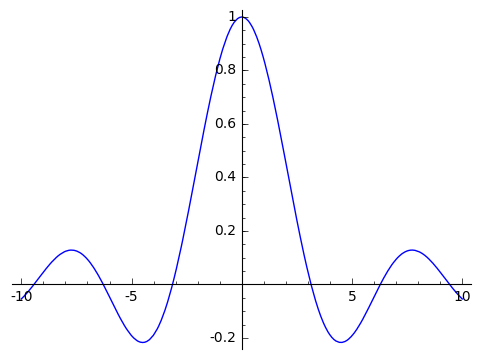

In [25]:
plot(f, [x, -10, 10], figsize=5) 

<html>
	<h3>関係式</h3>
	<p>
		Sageでの関係式の扱い方を以下の関係式eqを例に示します。
$$
		x + 2 \le 0
$$
	</p>
	<p>
		これをSageで表現すると以下の様になります。
	</p>
</html>

In [26]:
eq = x + 2 <= 0

<html>
	<p>
		関係式から左辺、等号、不等号のオペレータ、左辺を取得するには、それぞれlhs, operator, rhs関数を使用します。
	</p>
</html>

In [27]:
print eq.lhs()               # 左辺
print eq.operator()    # 等号、不等号などのオペレータ
print eq.rhs()              # 右辺

x + 2
<built-in function le>
0
